In [22]:
#Importing basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [23]:
#Reading and loading file
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df=pd.read_csv(url) # loading the file
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


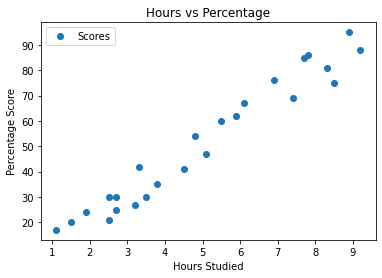

In [24]:
#plotting to check how data is spreaded
df.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [25]:
df.info() # checking the details of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [26]:
df.isnull().sum() # checking whether dataset has null values or not

Hours     0
Scores    0
dtype: int64

In [27]:
#First, defining input and output features
x=df.iloc[:,:-1]
y=df.iloc[:, -1]
# Checking the shape of input and output features
print('shape of the input features:',x.shape)
print('shape of the output features:',y.shape)

shape of the input features: (25, 1)
shape of the output features: (25,)


In [28]:
#After defining the input and output features, the training and test sets will be defined.
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)
print('shape of the  x_training data:',xtrain.shape)
print('shape of the ytraining data:',ytrain.shape)

shape of the  x_training data: (20, 1)
shape of the ytraining data: (20,)


In [29]:
#Fitting The Simple Linear Regression Model
#builing model
#1. import the model
from sklearn.linear_model import LinearRegression
#2. create an object of the model
lr=LinearRegression()
#3. fit the model or train the model
lr.fit(xtrain,ytrain)
#4. make predictions
ypred=lr.predict(xtest)

In [30]:
ypred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [31]:
from sklearn.metrics import r2_score #to check accuracy import r2_score
r2_score(ytest,ypred) 

0.9454906892105356

In [32]:
# The regression coefficient
print('The regression coefficient:', lr.coef_[0])

The regression coefficient: 9.910656480642237


In [33]:
# the regression intercept
print('The regression intercept:',lr.intercept_)

The regression intercept: 2.018160041434683


In [34]:
#The fitted regression line can be interpreted as:
print('The regression line is: y = ', lr.intercept_, '+', lr.coef_[0],'*X')


The regression line is: y =  2.018160041434683 + 9.910656480642237 *X


In [35]:
#intercept can be explained as value of y when x=0 that means if your study for 0 hours then
print("the predicted scores that is y when x=0:",lr.intercept_)

the predicted scores that is y when x=0: 2.018160041434683


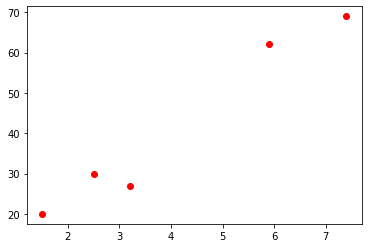

In [36]:
#Visualizing the fitted regression line against the predicted values
plt.scatter(xtest,ytest,color='red')

In [37]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(ytest,ypred)
print('mean squared error is:',MSE)

mean squared error is: 21.5987693072174


In [38]:
import math
RMSE=math.sqrt(MSE)
print('Root mean square error is:',RMSE)

Root mean square error is: 4.6474476121003665


In [39]:
r2_score(ytest,ypred)

0.9454906892105356

In [40]:
#comparing the predictive scores vs actual scores
pd.DataFrame(data={"Predictive scores":ypred,"Actual scores":ytest})

,Predictive scores,Actual scores
5,16.884145,20
2,33.732261,27
19,75.357018,69
16,26.794801,30
11,60.491033,62


In [41]:
#checkinh with the prediction with time

In [44]:
hours = 9.25
lr.predict([[hours]])

array([93.69173249])